In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import logging
logging.basicConfig(level=logging.INFO)

Processing sub-131_sam-8_Image_em.tiff... time: 15.316 s
 cleaning...time: 4.138 s


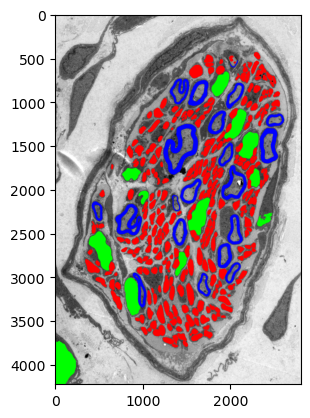

In [17]:
import os
import time

import matplotlib.pyplot as plt
import utils as ut

equalized = False
filename = "../sub-131_sam-8_Image_em.tiff"

models = ut.load_ensemble(equalized=equalized)

image = ut.load_image(filename)

print(f"Processing {os.path.basename(filename)}... ", end="")
start = time.time()
prediction = ut.predict_with_ensemble(models, image, equalized=equalized)
print("time: {:.3f} s".format(time.time()-start))

print(" cleaning...", end="")
start = time.time()
prediction = ut.clean_predictions(prediction)
print("time: {:.3f} s".format(time.time()-start))

composite = ut.create_overlay(image, prediction)
plt.imshow(composite)

In [22]:
from PIL import Image

# save results
name, _ = os.path.splitext(os.path.basename(filename))
Image.fromarray(prediction).save(f"{name}_pred.png")
Image.fromarray(composite).save(f"{name}_overlay.png")